### The Haberman’s survival data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [1]:
import pandas as pd
from pandas import Series as ss
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

In [2]:
heb = pd.read_csv('https://drive.google.com/uc?authuser=0&id=1o1I9PLyjqGgs0eOylK-2srXM2ZH3mIVb&export=download')

In [3]:
heb.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

### This dataset comprises of 4 features -:
* **Age** - Age of the patient
* **Year** - Year in which patient was operated
* **Nodes** - Number of lymph nodes.
* **Status** - Whether the patient is long survivor or short survivor
    * Long Survivor patients lives for atleast 5 Years (Status - 1)
    * Short Survivor patient lives for atmost 5 Years (Status - 2)

In [4]:
status_counts = heb['status'].value_counts().as_matrix()
print("Number of patients with status 1: {0}".format(status_counts[0]))
print("Number of patients with status 2: {0}".format(status_counts[1]))

Number of patients with status 1: 225
Number of patients with status 2: 81


In [5]:
print(heb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


* There is no null-data.
* Status has an integer datatype. It needs to be made categorical.

In [6]:
print(heb['status'].unique())
heb['status'] = heb['status'].map({1:'Yes', 2:'No'}).astype('category')

[1 2]


In [7]:
print(heb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


In [8]:
#There is Class Imbalance. We cannot use accuracy parameter to evaluate the performance of the trained model
heb.status.value_counts()

Yes    225
No      81
Name: status, dtype: int64

In [9]:
status_1 = heb.loc[heb.status == 'Yes']
status_2 = heb.loc[heb.status == 'No']

In [10]:
plt.style.use('seaborn')

### Pair Plot

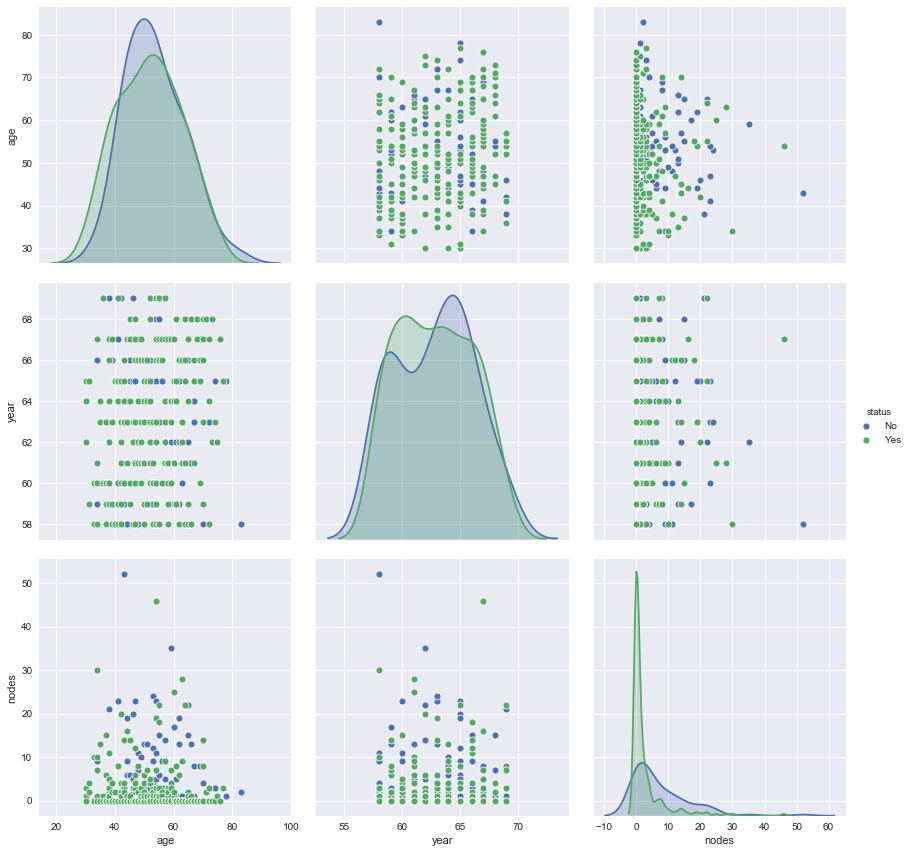

In [11]:
snb.pairplot(heb, hue='status', height=4)

### Observations
* In case of both single variate and bivariate, there is considerable amount of overlap between distribution of two classes. 



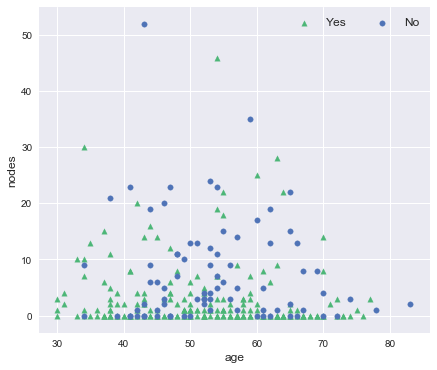

In [12]:
plt.rcParams['figure.figsize'] = (7, 6)
o1 = plt.scatter(status_1.age, status_1.nodes,s=30 ,marker='^', color='#4cb677')
o2 = plt.scatter(status_2.age, status_2.nodes,s=30 ,marker='o', color='#4f73b7')
plt.legend((o1,o2), ('Yes', 'No'), loc = "upper right", ncol=2, fontsize=12)
plt.xlabel('age', fontsize=12)
plt.ylabel('nodes', fontsize=12)
plt.show()

* Less likely to have patients with lymph nodes more than 30 i.e. data points with more more than 30 lymph nodes appear to be outliers


### Bar Plot Construction

In [13]:
bar_1 = status_1['year'].value_counts(sort = False).values
bar_2 = status_2['year'].value_counts(sort = False).values
x1 = np.sort(status_1['year'].unique())
x2 = x1 + 0.25
sum = bar_1.sum() + bar_2.sum()
bar_1 = bar_1/sum
bar_2 = bar_2/sum

[0.66666667 0.66666667 0.85714286 0.88461538 0.69565217 0.73333333
 0.74193548 0.53571429 0.78571429 0.84       0.76923077 0.63636364]


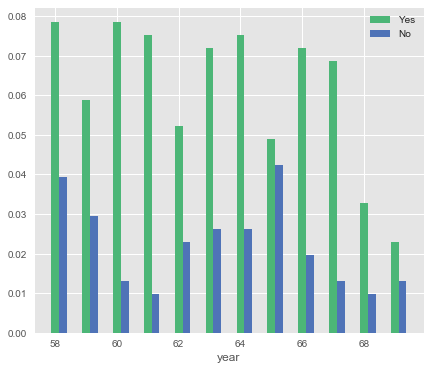

In [14]:
print((bar_1/(bar_1 + bar_2)))
plt.style.use('ggplot')
plt.xlabel('year')
plt.bar(x1, bar_1, width = 0.25, color = '#4cb677', label = 'Yes')
plt.bar(x2, bar_2, width = 0.25, color = '#4f73b7', label = 'No')
plt.legend()
plt.rcParams['figure.figsize'] = (10, 10)

plt.show()

### Observations
* 1961 was the year which had the largest ratio of 'success' to 'total number of surgeries' i.e. 88% of total surgeries.


## PDF of nodes feature

In [15]:
plt.rcParams['figure.figsize'] = (7,7)

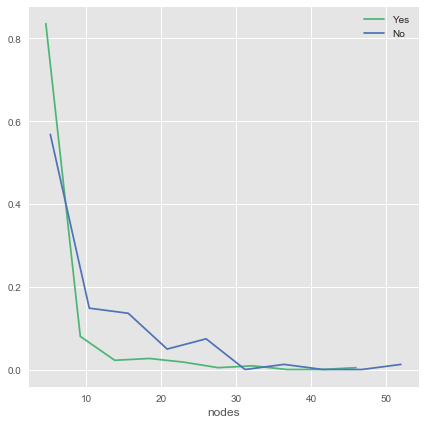

In [16]:
count, bins = np.histogram(status_1.nodes, bins = 10, density = False)
pdf = count/np.sum(count)
plt.xlabel('nodes')
plt.plot(bins[1:], pdf, color = '#4CB677', label = 'Yes')

count, bins = np.histogram(status_2.nodes, bins = 10, density = False)
pdf = count/np.sum(count)
plt.plot(bins[1:], pdf, color = '#4F73B7', label = 'No')
plt.rcParams['legend.loc'] = 'upper right'
plt.legend()
plt.show()


### Observation
* More than 90% of the patients who after surgery survived atleast 5 years had lymph nodes <= 10
* Majority of the patients had lymph nodes <= 10 (both success and failure patients)

### CDF of age Feature

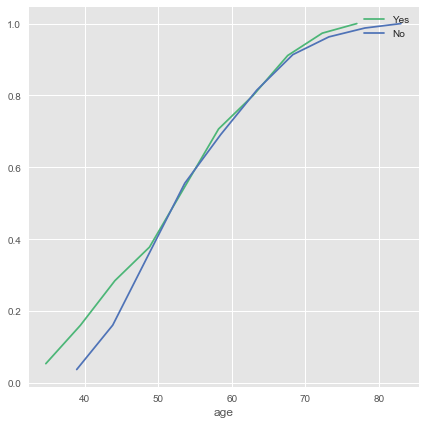

In [17]:
count, bins = np.histogram(status_1.age, bins = 10, density = False)
pdf = count/np.sum(count)
cdf = np.cumsum(pdf)
plt.xlabel('age')
plt.rcParams['figure.figsize'] = (7,7)
plt.plot(bins[1:], cdf, color = '#4CB677', label = 'Yes')

count, bins = np.histogram(status_2.age, bins = 10, density = False)
pdf = count/np.sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins[1:], cdf, color = '#4F73B7', label = 'No')
plt.rcParams['legend.loc'] = 'upper right'
plt.legend()
plt.show()



### Observations
* Patients with age<34 are Long Survivors 
* Patients with age>74 are Short Survivors

### Mean, Median, Std Dev, Quantiles

In [18]:
status_1.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [19]:
status_2.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Observations
* 75% of Long Survivors had lymph nodes <= 3
* 75% of Short Survivors had lymph nodes <= 11

## Bivariate Analysis-:
### Box Plots

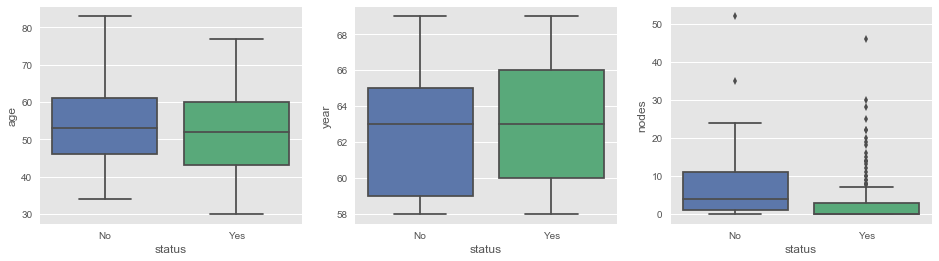

In [20]:
palt = snb.color_palette(['#4F73B7','#4CB677'])
axes = plt.subplots(1,3,figsize=(16,4))[1]
for id, feature in enumerate (heb.columns[:-1]):
    snb.boxplot(ax = axes[id], data = heb, x='status', y = feature, palette = palt)

### Observations
* From Plot (nodes vs status), it appears that data points with node count > 30 are outliers

### Conclusions
* There is significant amount of overlap between the distribution of two classes.
* Based on the plots, it appears that data points with lymph-nodes > 30 are outliers
* 1961 was the year which had the largest ratio of 'success' to 'total number of surgeries' i.e. 88% of the total surgeries.
* Majority of the patients had lymph nodes <= 10 (both success and failure patients)